In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Introduction to Artificial Neural Networks with Keras

Firstly for future reference, when should you use Keras or TensorFlow for building neural networks

    Keras:
        
        Very easy to use, great for beginners

        Limited to high-level APIs

        Less control over low-level details
        
        For prototyping and standard models

        Runs on top of Tensorflow
    
    Tensorflow

        Steeper learning curve, more complex

        Highly flexible, supports custom workflows

        Full control over every aspect of the model

        Research, custom models, production


## ANNs and Examples

ANNs are ML models that are inspired by the networks of biological neurons found in our brains. ANNs are at the very core of deep learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex machine learning tasks such as classifying billions of images, powering speech recognition services, recommending the best videos to watch to hundreds of millions of users every day, or learning to beat the world champion at the game of go.

### The Perceptron

The perceptron is one of the simples ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artiical neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU). The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU first computes a linear function of its inputs, then it applies a step function to the result. So we can see it almost like logistic regression, except it uses a step function instead of the logistic function. Just like in logistic regression, the model parameters are the input weights w and the bias term b. 

A single TLU can be used for simple linear binary classification, it computes a linear function of its inputs, and if the result exceeds a threshold, it outputs the positive class. A perceptron is composed of one of more TLUs organized in a single layer, where every TLU is connected to every input. This layer is called a fully connected layer or dense layer. The inputs constitute the input lyaer, and since the layer of TLUs produces the final outputs, it is called the output layer. For example, a  perceptron with 2 inputs and 3 TLUs could classify instances simultaneouslt into three different binary classes, making it a multilabel classifier. 

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) #Iris setosa

per_clf = Perceptron(random_state = 42)
per_clf.fit(X,y)
X_new = [[2,0.5],[3,1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

### The Multilayer Perceptron and Backpropagation

Some of the limitations of perceptrons can eb elimated by stacking multiple perceptrons (layers). The resulting ANN is called a multilayer perceptron (MLP). An MLP is composed of one input layer, one or more layers of TLUs called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input are usually called the lower layers, and the ones close to the outputs are usually called the upper layers.

When an ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN). The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations

#### So then, how are MLP Models Trained?

For many years MLPs could not be created as researchers failed to find ways to train them. At first gradient descent was proposed, which computed the gradients of the model's error with regard to model parameters, however this was unfeasible with computational limitations and no clear method of doing so.

Then, the reverse-mode automatic differentiation algorithm was proposed. The reverse mode auto diff can compute the gradients of the neural network's error with regard to every single model parameter in just two passes (one forward, one backward) of the network. In other words, it can find out how each connection weight/bias should be tweaked in order to reduce the neural network's error. These gradients can then be used to perform a gradient descent step. If you repeat this process of computing the gradients automatically and taking a gradient descent step, the neural network's error will gradually drop until it eventually reaches a minimum. This combination of reverse-mode autodiff and gradient descent is now called backpropagation. 

#### Backpropagation Step by Step

    Handles one mini-batch at a time (for example containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.

    Each mini-batch enters the network through the input layer. The algorithm then computes the output of all the neurons in the first hidden layer, for every instance in the mini-batch. The result is apsssed onto the next layer, its output is computed etc. until we get the ouput of the output layer. This is the forward-pass, it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backwards pass.

    Next, the backprop algorithm measures the network's output error (ie, using a loss function that computes the desired output and actual output of the nerwork, returning some measure of the error).

    Then it computes how much each output bias and connection to the output layer contributed to the error. The algorithm subsequently measures how much each of these error contributions came from each connection in the layer below, again using the chain rule, working backwards until it raches the input layer. 

    This reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network.

    Finally, the algorithm performs a gradient descent step to tweak all the connection weights in the network, using the error gradients it just computed.

### Regression MLPs

First, MLPs can be used for regression tasks. If you want to predict a single vlaue (e.g the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. 

For multivariate regression (i.e to predict multiple values at once), you need one output neuron per output dimension. 


In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#Fetching and splitting the dataset
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state = 42)
#creates a pipeline to standardize the input features before sending them to 
#MLP regressor, in practice this would be feature engineering
#this step is important for neural networks because they are trained using
#gradient descent, which does not converge well when features have different scales

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

#we then train the model and evaluate its validation error
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
print(mse)

rmse = mse ** 0.5

print(rmse)

#Continue from p.g 314

0.25536110312136884
0.5053326657968678


MLP regressor uses ReLU activation functions for the hidden layers, but fails to use it on the output layer. This is a limitation of the MLPRegressor class as it does not support any activation functions on the output layer. This is why scikit-learn is not optimal for creating these kinds of models.

## Implementing MLPs with Keras

Keras is TensorFlow's high-lelve deep learning API, allowing you to build, train, evaluate, and execute all sorts of neural networks. The first MLP we will build with Keras is a Classification MLP.

### What is a Classification MLP?

MLPs can handle both binary and multilabel classification tasks. For example an email classifcation system that predicts whether each email is ham or spam, and also whether it is urgent or nonurgent. 

If each instance (input) can only belong to a single class, out of 3 or more possible classes (e.g 0-9 for image of numbers classification), we need to have one output neuron per class, and we should use the softmax activation function for the whole output layer.

    Softmax Function: Activation function which ensures that all estimated probabilities are between 0 and 1, and that they add up to 1, since the calsses are exclusive. This achieves the same end goal as our multiclass classification in Chapter 3. 

For our loss function, we should use the cross-entropy loss (x-entropy) function as we are predicting probability distributions.

    Interpretation: Cross-entropy measures the "distance" between the true distribution and the predicted distribution in terms of probability.

    Probabilistic Output: The softmax function ensures that the output is a valid probability distribution (sums to 1), making it natural to use cross-entropy.

    Focus on Correct Class: The loss strongly penalizes incorrect predictions and rewards high confidence in correct predictions.

### Building an Image Classifier Using the Sequential API (Keras and Fashion MNIST)

The Fashion MNIST is a drop-in replacement of MNIST, where the images represent fashion items rather than handwritten digits. This makes the classification task far more complex.

In [5]:
import tensorflow as tf

#The dataset is already shuffled and split into training and test sets, so we just need to hold out on the last 5,000 images
#from the training set to use as a validation set
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
#tensorflow is usually imported as tf, and the Keras API is available via tf.keras
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

#For simplicity, we'll scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also converts them to floats)
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test/255.


In [6]:
#We first manually define a list of class names that correspond to the 
#numerical labels in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
#y_train[0] gets the numerical label of the first training image (9)
#we use this number as an index into class_names which returns Ankle boot
class_names[y_train[0]]

'Ankle boot'

In [ ]:
#Creating the model using the sequential API

tf.random.set_seed(42) #sets random seed for tensorflow
# tf.keras.utils.set_random_seed() is an alternative which sets the randomseed for Tensorflow, 
#python and NumPy

#Sequential model is the simplest kind of Keras model for neural networks only composed of a 
#single stack of layers connected sequentially. This is called the sequential APi
model = tf.keras.Sequential()
#next we build the input layer and add it to the model
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten()) #flatten layer converts each input image to a 1d array
#Dense layers have a certain amount of neurons and an activation function
#Each layer manages its own weight matrix, containing all the connection weights between the 
#neurons and their inputs
#It also manages a vector of bias terms (one per neuron)
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary() #This method displays all the model's layers, including each layer's name
#and it's number of parameters.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Note that dense layers often have a lot of parameters, For example the first hidden layer (dense) has 784 x 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters. This gives the model quite a lot of flexibility to fit the training data, but also means the model runs the risk of overfitting, especially when we don't have a lot of training data.

In [13]:
#We can get a model's list of layers using the layers attribute, or using the
#get_layer() method to access a layer by name

model.layers

hidden1 = model.layers[1] #in our case, the layer with index 1 in model is dense_3 as we 
#created other neural networks previously, this will change depending 
# on the order that you run the code

hidden1.name

model.get_layer('dense_3') is hidden1

True

In [8]:
#Instead of adding the layers one by one as in the previous example, it's often more convenient 
#to pass a list of layers when creating the Sequential model. You can also drop the Input layer
#and instead specify the input_shape in the first layer:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#All parameters of a layer can be accessed using the get_weights() and set_weights() methods.
#For a dense layer as in our Sequential model, this includes both connection weights/bias term

weights, biases = hidden1.get_weights() #get_weights returns arrays of biases, weights

weights #we seperate them into weights and biases respectively and then we can inspect them
weights.shape

biases.shape

array([[-0.01905416, -0.0135011 ,  0.03682976, ..., -0.03432151,
         0.02697493, -0.06716153],
       [ 0.06210591, -0.02984376, -0.02164529, ...,  0.03889368,
         0.03622238,  0.06468654],
       [-0.05059826, -0.04985394,  0.02094979, ..., -0.04002566,
         0.04765008,  0.0345116 ],
       ...,
       [-0.05960568, -0.06183277, -0.06904332, ..., -0.07217256,
        -0.06044647, -0.06770536],
       [ 0.03972965,  0.06005622, -0.02595117, ...,  0.00392867,
         0.06451987,  0.056135  ],
       [ 0.07380764,  0.01734012, -0.0536403 , ...,  0.01524645,
         0.01778628, -0.02953833]], dtype=float32)

(784, 300)

(300,)

In [21]:
#After the model is created, you must call its compile() method to specify the loss function
#and the optimizer to use. Optionally, you can specify a list of extra metrics to compute
#during training and evaluation

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])

We use the 'sparse_categorical_crossentropy' loss function because we have sparse labels (i.e, for each instance, there is just a target class index from 0- and the classes are exclusive). If instead we had one target probability per class for each instance (e.g one-hot vectors) then we would need to use the 'categorical_crossentropy' loss instead. If we were doing binary classification or multilabel binary classification, then we would use the 'sigmoid' activation function in the output layer instead of the softmax activation function, and we would use the binary_crossentropy loss function.

#### Training and evaluating the model

In [22]:
#Now that we have built and compiled the model, we can train it using it's fit() method
#the fit method returns a history object containing the training parameters (history.params)
#the list of epochs it went through (history.epoch), and most importantly a dictionary
#containing the loss and extra metrics it measured at the end of each epoch on the training
#and validation set
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.6722 - loss: 1.0187 - val_accuracy: 0.8216 - val_loss: 0.5233
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.8231 - loss: 0.5136 - val_accuracy: 0.8354 - val_loss: 0.4698
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.8402 - loss: 0.4583 - val_accuracy: 0.8454 - val_loss: 0.4437
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.8501 - loss: 0.4273 - val_accuracy: 0.8484 - val_loss: 0.4240
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.8585 - loss: 0.4052 - val_accuracy: 0.8544 - val_loss: 0.4097
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.8641 - loss: 0.3879 - val_accuracy: 0.8586 - val_loss: 0.3987
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.8687 - loss: 0.3735 - val_accuracy: 0.8590 - val_loss: 0.3894
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.8726 -

<Axes: xlabel='Epoch'>

<function matplotlib.pyplot.show(close=None, block=None)>

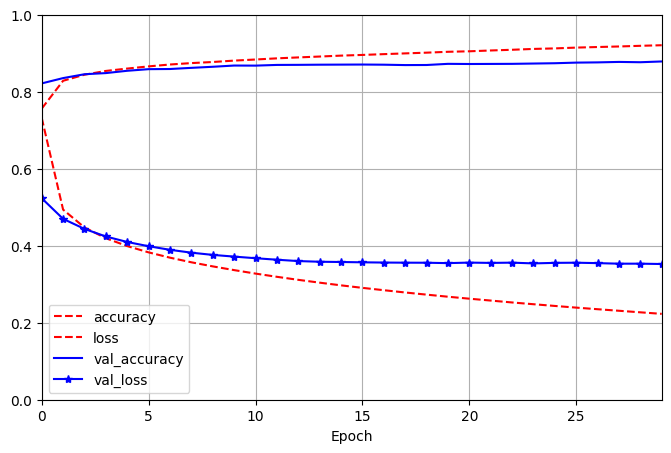

In [23]:
#We can use the history.history attribute to create a pandas dataframe and call its plot()
#method to get the learning curves

import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel ="Epoch",
    style=["r--","r--","b-","b-*"])
plt.show

You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. This is good. The validation curves are relatively close to each other at first, but they get further apart over time, which shows that there's a little bit of overfitting. In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training, but that's not the case. The validation error is computed at the end of each epoch, so the training curve should be shifted by half an epoch to the left.

The training set performance ends up beating the validation eprformance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. We can do this by simpl calling the fit() method again on the same model, since Keras just continues training where it left off: you should be able to reach about 89.8% validation accruacy, while the training accuracy will continue to rise up to 100%.

#### Tweaking and Evaluating a NN

If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one being the learning rate. If that doesn't help, try another optimizer (and always retune the learning rate after changing any hyperparameter). If the performance is still not geat, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer.

You can also try tuning other hyperparameters, such as the batch size (set in the fit() method using the batch_size argument). Once you are satisfied with your model's validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You do this by using the evaluate() method

In [24]:
model.evaluate(X_test, y_test)

#remember to resist the temptation to tweak the hyperparameters on the test set, or else your 
#estimate of the generalization error will be too optimistic

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8731 - loss: 0.3716


[0.37162983417510986, 0.8737000226974487]

#### Using the model to make predictions

Now that we have evaluated the model, we can use the predict() method to make predictions on new instances. Since we don't have actual new instances, we'll just use the first three instances of the test set.



In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

#For each instance (subarray) the model estimates one probability per class of object
#If we only care about the class with the highest estimated probability (even if it is quite low)
#then you can use the argmax method to get highest probability class index for each instance

import numpy as np

y_pred = y_proba.argmax(axis=-1)
y_pred
np.array(class_names)[y_pred]

#CONTINUE FROM 329

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.31, 0.  , 0.02, 0.  , 0.67],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

array([9, 2, 1])

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
#Saving a trained Keras model is simple

model.save("my_model.keras")
#You will typically have a script that trains a model and saves it, and one or more scripts
#that load the model and use it to evaluate it or to make predictions

In [31]:
#We can then load the model using the following code

loaded_model = tf.keras.models.load_model("my_model.keras")

In Summary, we built the Sequential classifier using the following steps. 

    First, load and preprocess the data by splitting it into training, validation, and test sets (using train_test_split or manual splitting) and scaling the pixel values to the 0-1 range by dividing by 255. 
    
    Then, build the model using tf.keras.Sequential(), adding layers in sequence - typically starting with a Flatten layer to convert 2D image data to 1D, followed by Dense layers with ReLU activation functions for hidden layers, and a final Dense layer with softmax activation for classification output. 
    
    Next, compile the model by specifying the loss function (e.g., 'sparse_categorical_crossentropy' for classification), optimizer (e.g., 'sgd'), and metrics (e.g., 'accuracy') using model.compile(). 
    
    Train the model using model.fit(), providing the training data, number of epochs, and validation data. 
    
    Finally, evaluate the model's performance on the test set using model.evaluate(), and once satisfied, use model.predict() to make predictions on new data.